# Progetto d'esame di Data Analysis in Experimental Physics with Machine Learning

Gruppo composto dagli studenti Luca Attinà, Sharis Feriotto e Matteo Marchisio Caprioglio

Dataset ipotesi: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

In [1]:
# Prova import dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)


Path to dataset files: /Users/2mc/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2


In [2]:
train_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
val_path = path + "/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
test_path = path + "/test/test"


In [3]:
test_path


'/Users/2mc/.cache/kagglehub/datasets/vipoooool/new-plant-diseases-dataset/versions/2/test/test'

In [ ]:
%ls "{train_path}"
%ls "{val_path}"
%ls "{test_path}"


Apple___Apple_scab/
Apple___Black_rot/
Apple___Cedar_apple_rust/
Apple___healthy/
Blueberry___healthy/
Cherry_(including_sour)___Powdery_mildew/
Cherry_(including_sour)___healthy/
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/
Corn_(maize)___Common_rust_/
Corn_(maize)___Northern_Leaf_Blight/
Corn_(maize)___healthy/
Grape___Black_rot/
Grape___Esca_(Black_Measles)/
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)/
Grape___healthy/
Orange___Haunglongbing_(Citrus_greening)/
Peach___Bacterial_spot/
Peach___healthy/
Pepper,_bell___Bacterial_spot/
Pepper,_bell___healthy/
Potato___Early_blight/
Potato___Late_blight/
Potato___healthy/
Raspberry___healthy/
Soybean___healthy/
Squash___Powdery_mildew/
Strawberry___Leaf_scorch/
Strawberry___healthy/
Tomato___Bacterial_spot/
Tomato___Early_blight/
Tomato___Late_blight/
Tomato___Leaf_Mold/
Tomato___Septoria_leaf_spot/
Tomato___Spider_mites Two-spotted_spider_mite/
Tomato___Target_Spot/
Tomato___Tomato_Yellow_Leaf_Curl_Virus/
Tomato___Tomato_mosaic_vir

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import os


In [6]:
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
img_size = (128, 128)
batch_size = 64

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode='rgb',
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    color_mode='rgb',
)


Found 70295 files belonging to 38 classes.


2025-07-10 14:58:07.288949: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Pro
2025-07-10 14:58:07.288978: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 48.00 GB
2025-07-10 14:58:07.288986: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 18.00 GB
2025-07-10 14:58:07.289013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-07-10 14:58:07.289031: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Found 17572 files belonging to 38 classes.


In [ ]:
class_names = train_ds.class_names
class_names.sort()
class_names


['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [10]:
# ipotesi modello
# convolutional 2d
# relu activation
# maxpooling forse?


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Activation, BatchNormalization, Dense, Conv2D, MaxPooling2D, Dropout, Flatten, GlobalAveragePooling2D, ReLU, Rescaling
from keras.optimizers.legacy import Adam, SGD
from keras.losses import CategoricalCrossentropy

from keras.metrics import CategoricalAccuracy, Precision, Recall
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

def simple_cnn(input_shape=(img_size[0], img_size[1], 3), num_classes=38):
    model = Sequential([
        Rescaling(1./255, input_shape=input_shape),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        Dropout(0.2),
        MaxPooling2D((2, 2)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    return model

model = simple_cnn()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                   

In [12]:
optimizer = Adam(learning_rate=0.0002)
# optimizer = SGD(learning_rate=0.05, momentum=0.9)
model.compile(
    optimizer=optimizer,
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)


In [13]:
n_epochs = 30

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=n_epochs,
    callbacks=[
        EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
        # ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True),
        # ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
    ]
)


Epoch 1/30
   1/1099 [..............................] - ETA: 5:49 - loss: 3.6503 - accuracy: 0.0781

2025-07-10 14:58:35.211539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1099/1099 [==============================] - 23s 21ms/step - loss: 3.3178 - accuracy: 0.1083 - val_loss: 3.0706 - val_accuracy: 0.1701
Epoch 2/30
1099/1099 [==============================] - 23s 21ms/step - loss: 2.8683 - accuracy: 0.2244 - val_loss: 2.7984 - val_accuracy: 0.2593
Epoch 3/30
1099/1099 [==============================] - 23s 21ms/step - loss: 2.6138 - accuracy: 0.2979 - val_loss: 2.5803 - val_accuracy: 0.3092
Epoch 4/30
1099/1099 [==============================] - 24s 21ms/step - loss: 2.4207 - accuracy: 0.3462 - val_loss: 2.4026 - val_accuracy: 0.3549
Epoch 5/30
1099/1099 [==============================] - 23s 21ms/step - loss: 2.2750 - accuracy: 0.3781 - val_loss: 2.2729 - val_accuracy: 0.3770
Epoch 6/30
1099/1099 [==============================] - 23s 21ms/step - loss: 2.1471 - accuracy: 0.4054 - val_loss: 2.1697 - val_accuracy: 0.4059
Epoch 7/30
1099/1099 [==============================] - 23s 21ms/step - loss: 2.0524 - accuracy: 0.4271 - val_loss: 2.0855 - val_accura

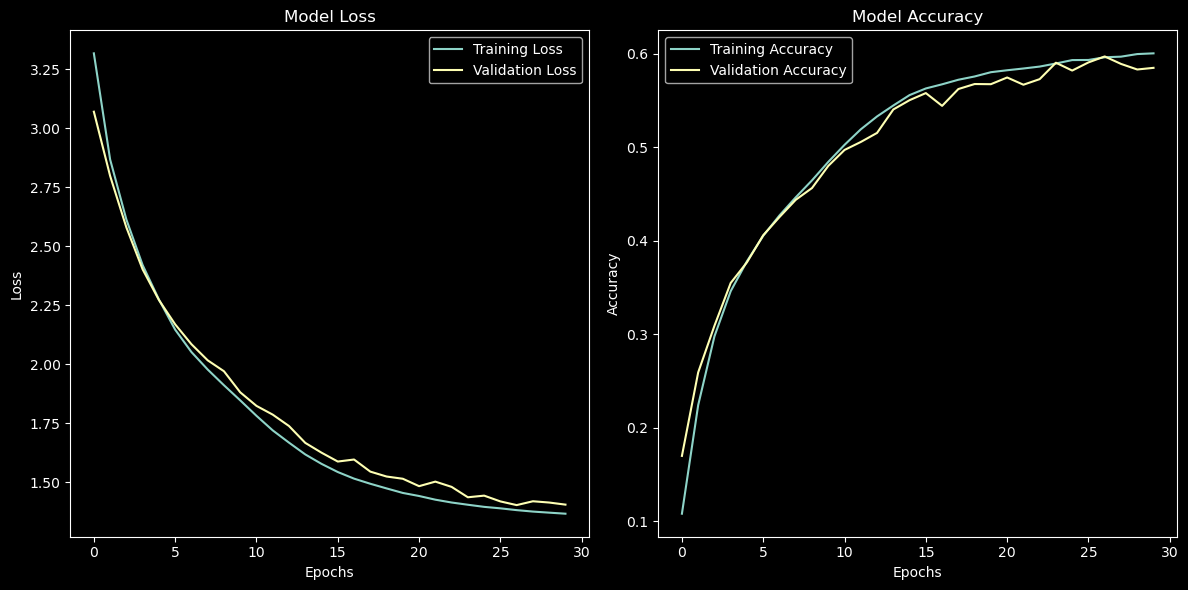

In [14]:
# plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
class_names = train_ds.class_names  # Use your training set's class names

test_images = [f for f in os.listdir(test_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for fname in test_images:
    img = tf.keras.utils.load_img(os.path.join(test_path, fname), target_size=img_size)
    img_array = tf.keras.utils.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    preds = model.predict(img_array)
    pred_idx = np.argmax(preds, axis=1)[0]
    pred_class = class_names[pred_idx]

    print(f"Image: {fname} -> Predicted class: {pred_class}")


1/1 [==============================] - 0s 55ms/step
Image: AppleScab3.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 9ms/step
Image: TomatoEarlyBlight2.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 8ms/step
Image: TomatoEarlyBlight3.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 8ms/step
Image: PotatoHealthy1.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 8ms/step
Image: AppleScab2.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 8ms/step
Image: TomatoEarlyBlight1.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 8ms/step
Image: PotatoHealthy2.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 8ms/step
Image: AppleScab1.JPG -> Predicted class: Peach___healthy
1/1 [==============================] - 0s 9ms/step
Image: TomatoEarlyBlight4.JPG -> Predicted c